In [209]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
a=pd.read_csv("Downloads/imports-85.data", header=None)
a.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [70]:
for i in range(26):
    nr=a[a[i]=='?'].shape[0]
    if nr>0:
        print(i,':',nr)

1 : 41
5 : 2
18 : 4
19 : 4
21 : 2
22 : 2
25 : 4


F:\Program Files\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [71]:
a.dtypes

0       int64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9     float64
10    float64
11    float64
12    float64
13      int64
14     object
15     object
16      int64
17     object
18     object
19     object
20    float64
21     object
22     object
23      int64
24      int64
25     object
dtype: object

## Exercise 1

In [72]:
for i in range(len(a.columns)):
    if (i!=5) and (a[i].dtypes=='object') and (a[a[i]=='?'].shape[0]>0):
    #not including att-5 (num-of-doors)
        print('\nAttribute-',i,':',a[a[i]=='?'].shape[0])
        a[i] = a[i].replace('?', np.NaN)
        a[i] = a[i].astype('float64')            
a.dtypes


Attribute- 1 : 41

Attribute- 18 : 4

Attribute- 19 : 4

Attribute- 21 : 2

Attribute- 22 : 2

Attribute- 25 : 4


0       int64
1     float64
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9     float64
10    float64
11    float64
12    float64
13      int64
14     object
15     object
16      int64
17     object
18    float64
19    float64
20    float64
21    float64
22    float64
23      int64
24      int64
25    float64
dtype: object

## Exercise 2

In [73]:
a[5] = a[5].replace('?', np.NaN)
a_drop=a.dropna()
a_drop.shape[0]

159

In [74]:
a.shape[0]

205

In [75]:
a_drop=a.dropna(axis='columns')
a_drop.shape

(205, 19)

In [76]:
a_drop=a.dropna(how='all')
a_drop.shape

(205, 26)

In [77]:
a_drop=a.dropna(thresh=24)
a_drop.shape

(203, 26)

## Exercise 3

In [78]:
for i in range(len(a.columns)):
    if (a[a[i].isnull()].shape[0]>0):
        print('\nAttribute-',i,' (before) :',a[a[i].isnull()].shape[0])
        if (a[i].dtypes in ['int64','float64']):
            a[i].fillna(a[a[i].notnull()][i].mean(), inplace=True)
        else:
            a[i].fillna(a[a[i].notnull()][i].mode()[0], inplace=True)
        print('\nAttribute-',i,' (after) :',a[a[i].isnull()].shape[0])
a.describe()


Attribute- 1  (before) : 41

Attribute- 1  (after) : 0

Attribute- 5  (before) : 2

Attribute- 5  (after) : 0

Attribute- 18  (before) : 4

Attribute- 18  (after) : 0

Attribute- 19  (before) : 4

Attribute- 19  (after) : 0

Attribute- 21  (before) : 2

Attribute- 21  (after) : 0

Attribute- 22  (before) : 2

Attribute- 22  (after) : 0

Attribute- 25  (before) : 4

Attribute- 25  (after) : 0


,0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [79]:
a[5].describe()

count      205
unique       2
top       four
freq       116
Name: 5, dtype: object

In [80]:
b=a.drop(2,axis=1)
b.head(3)

,0,1,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,3,122.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [81]:
c=a.drop(0)
c.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0


In [82]:
a['isLuxury'] = a.apply(lambda row: 1 if ((row[7]=='rwd') and (row[8]=='front')) else 0,axis=1)
a['isLuxury'] = a['isLuxury'].astype("category")
a.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,isLuxury
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0


## Exercise 4

In [83]:
a['fueleconomy'] = 0.55*a[23]+0.45*a[24]
a['fueleconomy'] = a['fueleconomy'].astype("float64")
a.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,isLuxury,fueleconomy
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1,23.70
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,23.70
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,22.15
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,26.70
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,19.80


In [84]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
newa = a.select_dtypes(include=['float64'])
newa_scaled = min_max_scaler.fit_transform(newa)
newa =pd.DataFrame(newa_scaled)
newa.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.664286,0.290476,0.1250,0.262500,0.346939,0.207959,0.244170
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.664286,0.290476,0.1250,0.262500,0.346939,0.282558,0.244170
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.100000,0.666667,0.1250,0.441667,0.346939,0.282558,0.201646
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.464286,0.633333,0.1875,0.225000,0.551020,0.219254,0.326475
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.464286,0.633333,0.0625,0.279167,0.551020,0.306142,0.137174


In [85]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
a_std = a.select_dtypes(include=['float64'])
a_std = a_std.dropna()
a_std=sc.fit_transform(a_std)
a_std = pd.DataFrame(a_std)
a_std.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,0.519089,-1.839404,-0.288349,0.171065,-0.263484,0.036674,-0.604374
1,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,0.519089,-1.839404,-0.288349,0.171065,-0.263484,0.419498,-0.604374
2,0.000000,-0.708596,-0.231513,-0.190566,-0.543527,-2.404862,0.685920,-0.288349,1.261807,-0.263484,0.419498,-0.838056
3,1.328961,0.173698,0.207256,0.136542,0.235942,-0.517248,0.462157,-0.035973,-0.057230,0.787346,0.094639,-0.152086
4,1.328961,0.107110,0.207256,0.230001,0.235942,-0.517248,0.462157,-0.540725,0.272529,0.787346,0.540524,-1.192348


In [86]:
a.dtypes

0                 int64
1               float64
2                object
3                object
4                object
5                object
6                object
7                object
8                object
9               float64
10              float64
11              float64
12              float64
13                int64
14               object
15               object
16                int64
17               object
18              float64
19              float64
20              float64
21              float64
22              float64
23                int64
24                int64
25              float64
isLuxury       category
fueleconomy     float64
dtype: object

In [87]:
a[5]=a[5].replace({'two':2, 'four':4})

In [88]:
a.head(3)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,isLuxury,fueleconomy
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1,23.70
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,23.70
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,22.15


In [89]:
for i in range(len(a.columns)):
    if (a[a.columns[i]].dtypes=='object'):
        a[a.columns[i]] = a[a.columns[i]].astype('category')
        a[a.columns[i]] = a[a.columns[i]].cat.codes
a.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,isLuxury,fueleconomy
0,3,122.0,0,1,0,2,0,2,0,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1,23.70
1,3,122.0,0,1,0,2,0,2,0,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,23.70
2,1,122.0,0,1,0,2,2,2,0,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,22.15
3,2,164.0,1,1,0,4,3,1,0,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,26.70
4,2,164.0,1,1,0,4,3,0,0,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,19.80


In [90]:
a[1].dtypes

dtype('float64')

In [91]:
a_encode = pd.get_dummies(data=a, columns=[2])
a_encode.iloc[0:205,27:49]

,2_0,2_1,2_2,2_3,2_4,2_5,2_6,2_7,2_8,2_9,...,2_12,2_13,2_14,2_15,2_16,2_17,2_18,2_19,2_20,2_21
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
a_encode['2_0'].value_counts()

0    202
1      3
Name: 2_0, dtype: int64

In [93]:
a.dtypes

0                 int64
1               float64
2                  int8
3                  int8
4                  int8
5                 int64
6                  int8
7                  int8
8                  int8
9               float64
10              float64
11              float64
12              float64
13                int64
14                 int8
15                 int8
16                int64
17                 int8
18              float64
19              float64
20              float64
21              float64
22              float64
23                int64
24                int64
25              float64
isLuxury       category
fueleconomy     float64
dtype: object

In [94]:
a.iloc[0:3,0:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3,122.0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68
1,3,122.0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68
2,1,122.0,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47


In [95]:
a.iloc[0:3,20:28]

,20,21,22,23,24,25,isLuxury,fueleconomy
0,9.0,111.0,5000.0,21,27,13495.0,1,23.70
1,9.0,111.0,5000.0,21,27,16500.0,1,23.70
2,9.0,154.0,5000.0,19,26,16500.0,1,22.15


## Exercise 6

In [96]:
#tidak perlu dilakukan dikarenakan pada sebelumnya sudah di encoding semua, sehingga sudah sesuai.

## Exercise 7

In [97]:
bins = [0,10000,20000,40000]
car_bin=['Budget','Medium','Highend']
a['carsrange'] =pd.cut(a[25],bins,right=False,labels=car_bin)
a.head(10)
# membuat atribut baru dengan nama carsrange yang mana mengkategrikan dari harga. 

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,isLuxury,fueleconomy,carsrange
0,3,122.0,0,1,0,2,0,2,0,88.6,...,2.68,9.0,111.0,5000.0,21,27,13495.000000,1,23.70,Medium
1,3,122.0,0,1,0,2,0,2,0,88.6,...,2.68,9.0,111.0,5000.0,21,27,16500.000000,1,23.70,Medium
2,1,122.0,0,1,0,2,2,2,0,94.5,...,3.47,9.0,154.0,5000.0,19,26,16500.000000,1,22.15,Medium
3,2,164.0,1,1,0,4,3,1,0,99.8,...,3.40,10.0,102.0,5500.0,24,30,13950.000000,0,26.70,Medium
4,2,164.0,1,1,0,4,3,0,0,99.4,...,3.40,8.0,115.0,5500.0,18,22,17450.000000,0,19.80,Medium
5,2,122.0,1,1,0,2,3,1,0,99.8,...,3.40,8.5,110.0,5500.0,19,25,15250.000000,0,21.70,Medium
6,1,158.0,1,1,0,4,3,1,0,105.8,...,3.40,8.5,110.0,5500.0,19,25,17710.000000,0,21.70,Medium
7,1,122.0,1,1,0,4,4,1,0,105.8,...,3.40,8.5,110.0,5500.0,19,25,18920.000000,0,21.70,Medium
8,1,158.0,1,1,1,4,3,1,0,105.8,...,3.40,8.3,140.0,5500.0,17,20,23875.000000,0,18.35,Highend
9,0,122.0,1,1,1,2,2,0,0,99.5,...,3.40,7.0,160.0,5500.0,16,22,13207.129353,0,18.70,Medium


In [98]:
i=3
a[a.columns[i]]=a[a.columns[i]].astype('category')
dict_3=dict(enumerate(a[a.columns[i]].cat.categories))
a[a.columns[i]] = a[a.columns[i]].cat.codes
dict_3

{0: 0, 1: 1}

In [99]:
a.to_csv(index=False)

'0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,isLuxury,fueleconomy,carsrange\r\n3,122.0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1,23.700000000000003,Medium\r\n3,122.0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,23.700000000000003,Medium\r\n1,122.0,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1,22.150000000000002,Medium\r\n2,164.0,1,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0,0,26.700000000000003,Medium\r\n2,164.0,1,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0,0,19.8,Medium\r\n2,122.0,1,1,0,2,3,1,0,99.8,177.3,66.3,53.1,2507,3,1,136,5,3.19,3.4,8.5,110.0,5500.0,19,25,15250.0,0,21.700000000000003,Medium\r\n1,158.0,1,1,0,4,3,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,5,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0,0,21.700000000000003,Medium\r\n1,1

In [213]:
x=pd.read_csv("Downloads/winequality-white.csv", sep=';')
z=pd.read_csv("Downloads/winequality-white.csv", sep=';')
x.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [186]:
x.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [103]:
#tipe data sudah sesuai

In [122]:
#tidak ada missing value

In [187]:
#outliers
for i in range(len(x.columns)):
    if (x[x.columns[i]].dtypes in ['int64','float64']):
        print('\nAttribute-',x.columns[i],':',x[x.columns[i]].dtypes)
        Q1=x[x.columns[i]].quantile(0.25)
        print('Q1',Q1)
        Q3=x[x.columns[i]].quantile(0.75)
        print('Q3',Q3)
        IQR=Q3-Q1
        print('IQR',IQR)
        min=x[x.columns[i]].min()
        max=x[x.columns[i]].max()
        min_IQR=Q1-1.5*IQR
        max_IQR=Q3+1.5*IQR
        if (min<min_IQR):
            print('Low outlier is found')
        if (max>max_IQR):
            print('High outlier is found')


Attribute- fixed acidity : float64
Q1 6.3
Q3 7.3
IQR 1.0
Low outlier is found
High outlier is found

Attribute- volatile acidity : float64
Q1 0.21
Q3 0.32
IQR 0.11000000000000001
High outlier is found

Attribute- citric acid : float64
Q1 0.27
Q3 0.39
IQR 0.12
Low outlier is found
High outlier is found

Attribute- residual sugar : float64
Q1 1.7
Q3 9.9
IQR 8.200000000000001
High outlier is found

Attribute- chlorides : float64
Q1 0.036000000000000004
Q3 0.05
IQR 0.013999999999999999
Low outlier is found
High outlier is found

Attribute- free sulfur dioxide : float64
Q1 23.0
Q3 46.0
IQR 23.0
High outlier is found

Attribute- total sulfur dioxide : float64
Q1 108.0
Q3 167.0
IQR 59.0
Low outlier is found
High outlier is found

Attribute- density : float64
Q1 0.9917225000000001
Q3 0.9961
IQR 0.004377499999999923
High outlier is found

Attribute- pH : float64
Q1 3.09
Q3 3.28
IQR 0.18999999999999995
Low outlier is found
High outlier is found

Attribute- sulphates : float64
Q1 0.41
Q3 0.55
IQ

In [188]:
x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [196]:
#mengubah outliers dengan nilai rata-rata pada setiap atribut
x.loc[x['fixed acidity'] < 4.8, 'fixed acidity'] = 6.854788
x.loc[x['fixed acidity'] > 8.8, 'fixed acidity'] = 6.854788
x.loc[x['volatile acidity'] > 0.45, 'volatile acidity'] = 0.278241
x.loc[x['citric acid'] < 0.15, 'citric acid'] = 0.334192
x.loc[x['citric acid'] > 0.49, 'citric acid'] = 0.334192
x.loc[x['residual sugar'] > 22.2, 'residual sugar'] = 6.391415
x.loc[x['chlorides'] < 0.0165, 'chlorides'] = 0.045772
x.loc[x['chlorides'] > 0.0685, 'chlorides'] = 0.045772
x.loc[x['free sulfur dioxide'] > 78, 'free sulfur dioxide'] = 35.308085
x.loc[x['total sulfur dioxide'] < 19.5, 'total sulfur dioxide'] = 138.360657
x.loc[x['total sulfur dioxide'] > 255.5, 'total sulfur dioxide'] = 138.360657
x.loc[x['density'] > 1.0026655, 'density'] = 0.994027
x.loc[x['pH'] < 2.805, 'pH'] = 3.188267
x.loc[x['pH'] > 3.54, 'pH'] = 3.188267
x.loc[x['sulphates'] > 0.735, 'sulphates'] = 0.489847
x.loc[x['quality'] < 3.5, 'quality'] = 6
x.loc[x['quality'] > 7.5, 'quality'] = 6

Text(0.5, 1.0, 'quality')

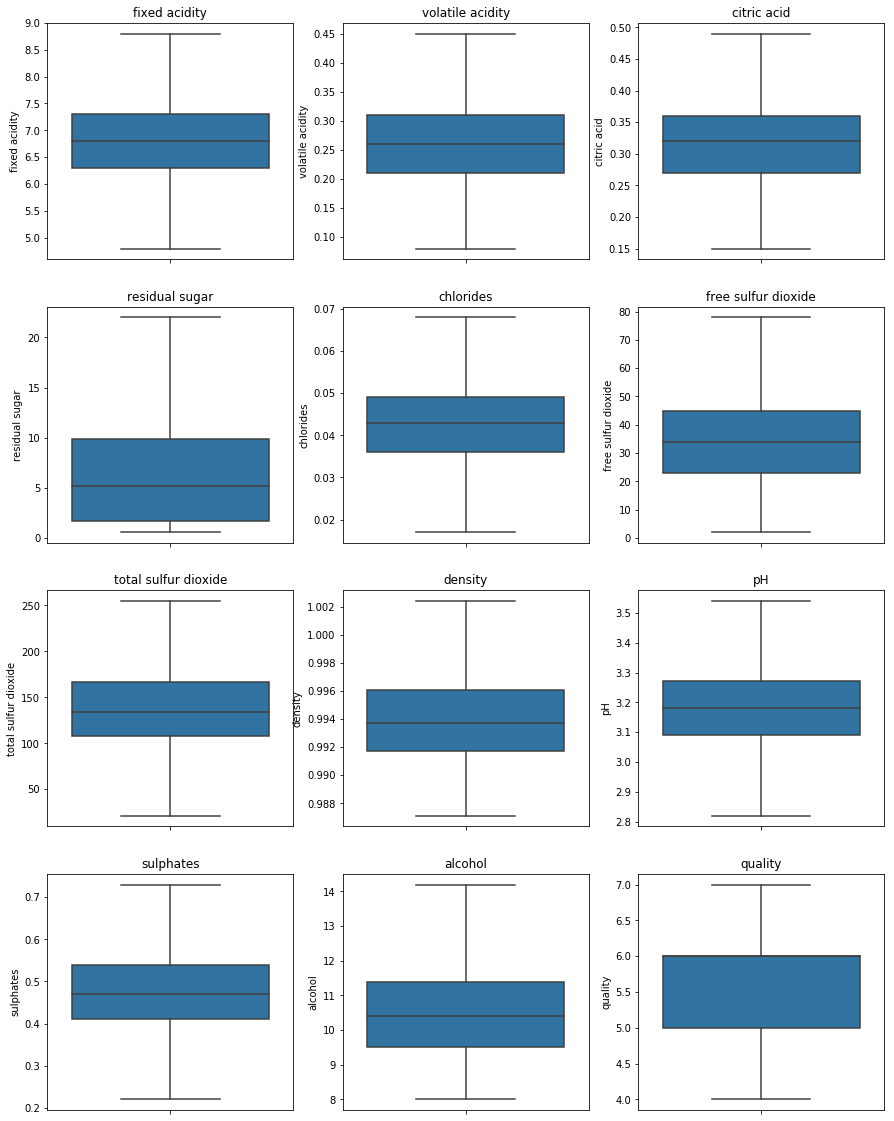

In [190]:
f, axes = plt.subplots(4,3, figsize=(15,20), sharex=True)
sns.boxplot(y=x['fixed acidity'], ax=axes[0][0]).set_title('fixed acidity')
sns.boxplot(y=x['volatile acidity'], ax=axes[0][1]).set_title('volatile acidity')
sns.boxplot(y=x['citric acid'], ax=axes[0][2]).set_title('citric acid')
sns.boxplot(y=x['residual sugar'], ax=axes[1][0]).set_title('residual sugar')
sns.boxplot(y=x['chlorides'], ax=axes[1][1]).set_title('chlorides')
sns.boxplot(y=x['free sulfur dioxide'], ax=axes[1][2]).set_title('free sulfur dioxide')
sns.boxplot(y=x['total sulfur dioxide'], ax=axes[2][0]).set_title('total sulfur dioxide')
sns.boxplot(y=x['density'], ax=axes[2][1]).set_title('density')
sns.boxplot(y=x['pH'], ax=axes[2][2]).set_title('pH')
sns.boxplot(y=x['sulphates'], ax=axes[3][0]).set_title('sulphates')
sns.boxplot(y=x['alcohol'], ax=axes[3][1]).set_title('alcohol')
sns.boxplot(y=x['quality'], ax=axes[3][2]).set_title('quality')

In [191]:
#outliers
for i in range(len(x.columns)):
    if (x[x.columns[i]].dtypes in ['int64','float64']):
        print('\nAttribute-',x.columns[i],':',x[x.columns[i]].dtypes)
        Q1=x[x.columns[i]].quantile(0.25)
        print('Q1',Q1)
        Q3=x[x.columns[i]].quantile(0.75)
        print('Q3',Q3)
        IQR=Q3-Q1
        print('IQR',IQR)
        min=x[x.columns[i]].min()
        max=x[x.columns[i]].max()
        min_IQR=Q1-1.5*IQR
        max_IQR=Q3+1.5*IQR
        if (min<min_IQR):
            print('Low outlier is found')
        if (max>max_IQR):
            print('High outlier is found')


Attribute- fixed acidity : float64
Q1 6.3
Q3 7.3
IQR 1.0

Attribute- volatile acidity : float64
Q1 0.21
Q3 0.31
IQR 0.1

Attribute- citric acid : float64
Q1 0.27
Q3 0.36
IQR 0.08999999999999997

Attribute- residual sugar : float64
Q1 1.7
Q3 9.837499999999999
IQR 8.1375

Attribute- chlorides : float64
Q1 0.036000000000000004
Q3 0.049
IQR 0.012999999999999998

Attribute- free sulfur dioxide : float64
Q1 23.0
Q3 45.0
IQR 22.0

Attribute- total sulfur dioxide : float64
Q1 108.0
Q3 167.0
IQR 59.0

Attribute- density : float64
Q1 0.9917225000000001
Q3 0.9961
IQR 0.004377499999999923

Attribute- pH : float64
Q1 3.09
Q3 3.27
IQR 0.18000000000000016

Attribute- sulphates : float64
Q1 0.41
Q3 0.54
IQR 0.13000000000000006

Attribute- alcohol : float64
Q1 9.5
Q3 11.4
IQR 1.9000000000000004

Attribute- quality : float64
Q1 5.0
Q3 6.0
IQR 1.0


<p> Sudah tidak terdapat outliers</p>

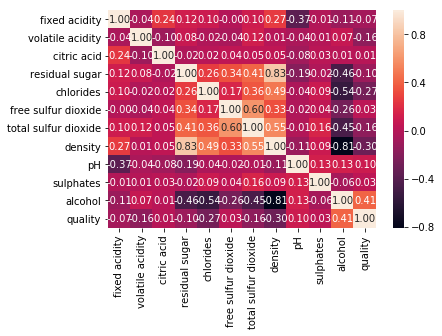

In [192]:
#hasil korelasi sesudah dilakukan data preparation
corr = x.corr()
sns.heatmap(corr,annot=True, fmt='.2f')

<p> Korelasi antara density dengan residual sugar memiliki nilai sebesar 0.83 dan korelasi antara density dengan alcochol memiliki nilai sebesar -0.81. Dikarenakan hanya hubungan tersebut yang memiliki nilai korelasi yang tinggi maka akan divisualkan dengan lebih detail</p>

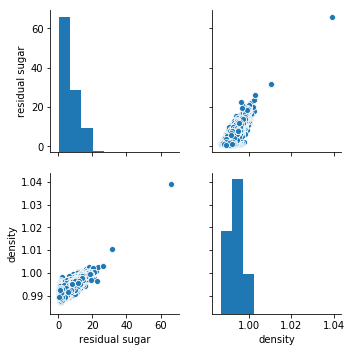

In [218]:
#hubungan antara residual sugar dengan density
pairplot_x=x[x.columns[np.r_[3,7]]]
sns.pairplot(data=pairplot_x)

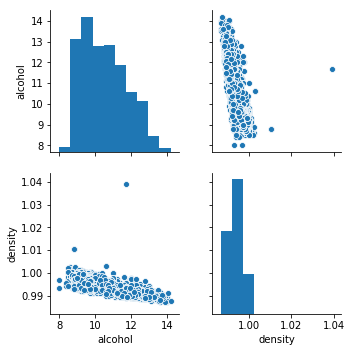

In [219]:
#hubungan antara alcohol dengan density
pairplot_x=x[x.columns[np.r_[10,7]]]
sns.pairplot(data=pairplot_x)

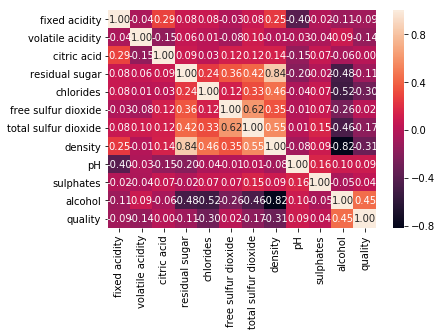

In [214]:
#hasil korelasi sebelum dilakukan data preparation
corr = y.corr()
sns.heatmap(corr,annot=True, fmt='.2f')

In [197]:
#imbalanced data
imbalanced_dataset=x['quality'].value_counts()
print(imbalanced_dataset)

6    2398
5    1457
7     880
4     163
Name: quality, dtype: int64


Text(0.5, 1.0, 'imbalanced dataset')

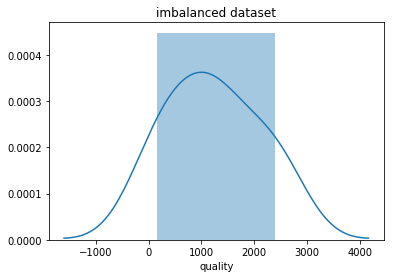

In [212]:
sns.distplot(imbalanced_dataset).set_title('imbalanced dataset')

Text(0.5, 1.0, 'quality')

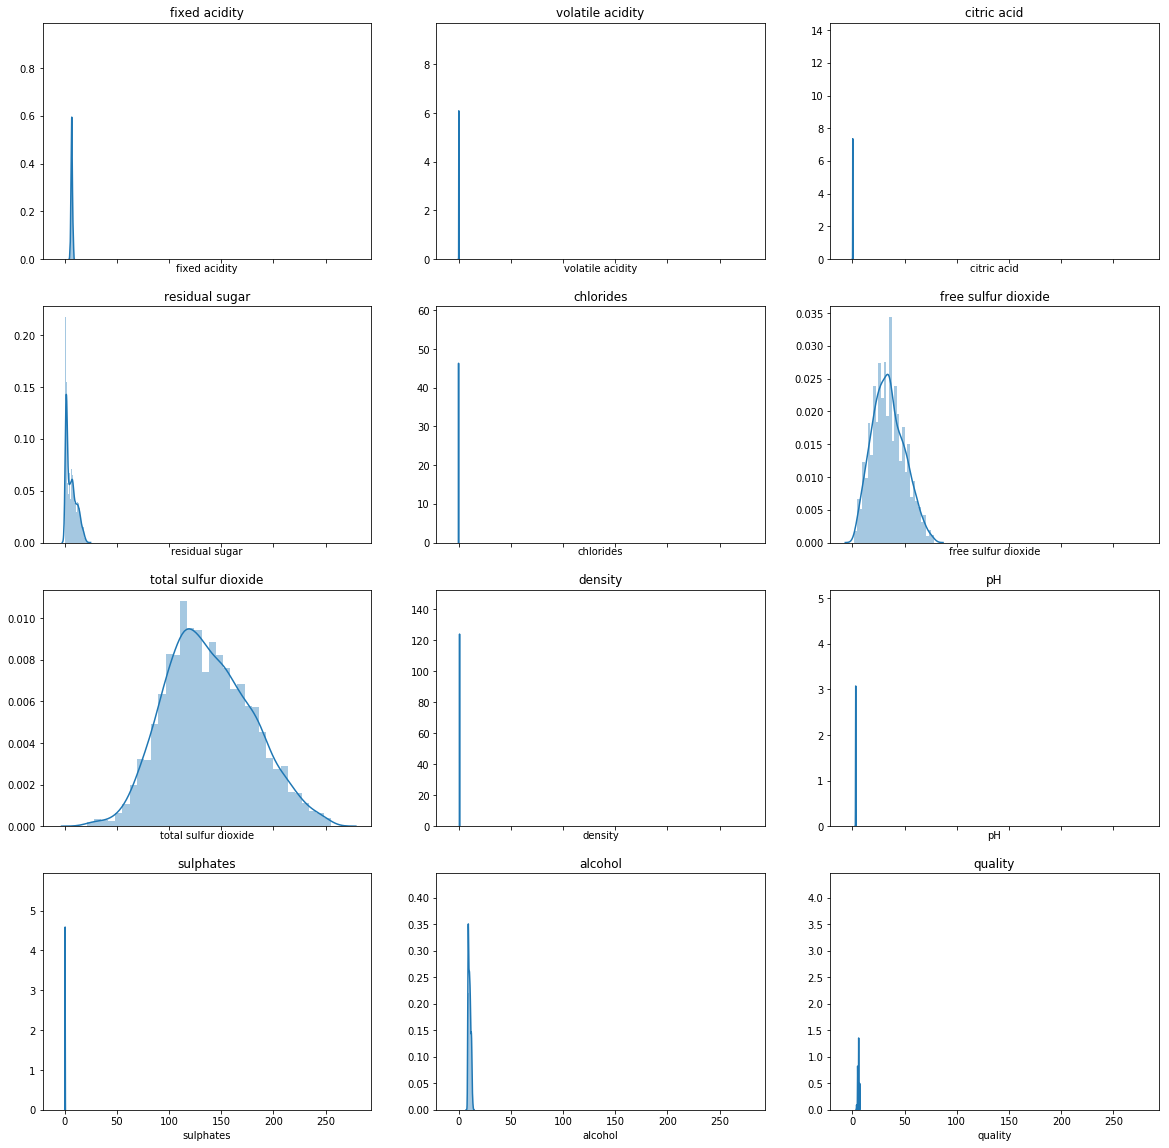

In [198]:
f, axes = plt.subplots(4,3, figsize=(20,20), sharex=True)
sns.distplot(x['fixed acidity'], ax=axes[0][0]).set_title('fixed acidity')
sns.distplot(x['volatile acidity'], ax=axes[0][1]).set_title('volatile acidity')
sns.distplot(x['citric acid'], ax=axes[0][2]).set_title('citric acid')
sns.distplot(x['residual sugar'], ax=axes[1][0]).set_title('residual sugar')
sns.distplot(x['chlorides'], ax=axes[1][1]).set_title('chlorides')
sns.distplot(x['free sulfur dioxide'], ax=axes[1][2]).set_title('free sulfur dioxide')
sns.distplot(x['total sulfur dioxide'], ax=axes[2][0]).set_title('total sulfur dioxide')
sns.distplot(x['density'], ax=axes[2][1]).set_title('density')
sns.distplot(x['pH'], ax=axes[2][2]).set_title('pH')
sns.distplot(x['sulphates'], ax=axes[3][0]).set_title('sulphates')
sns.distplot(x['alcohol'], ax=axes[3][1]).set_title('alcohol')
sns.distplot(x['quality'], ax=axes[3][2]).set_title('quality')

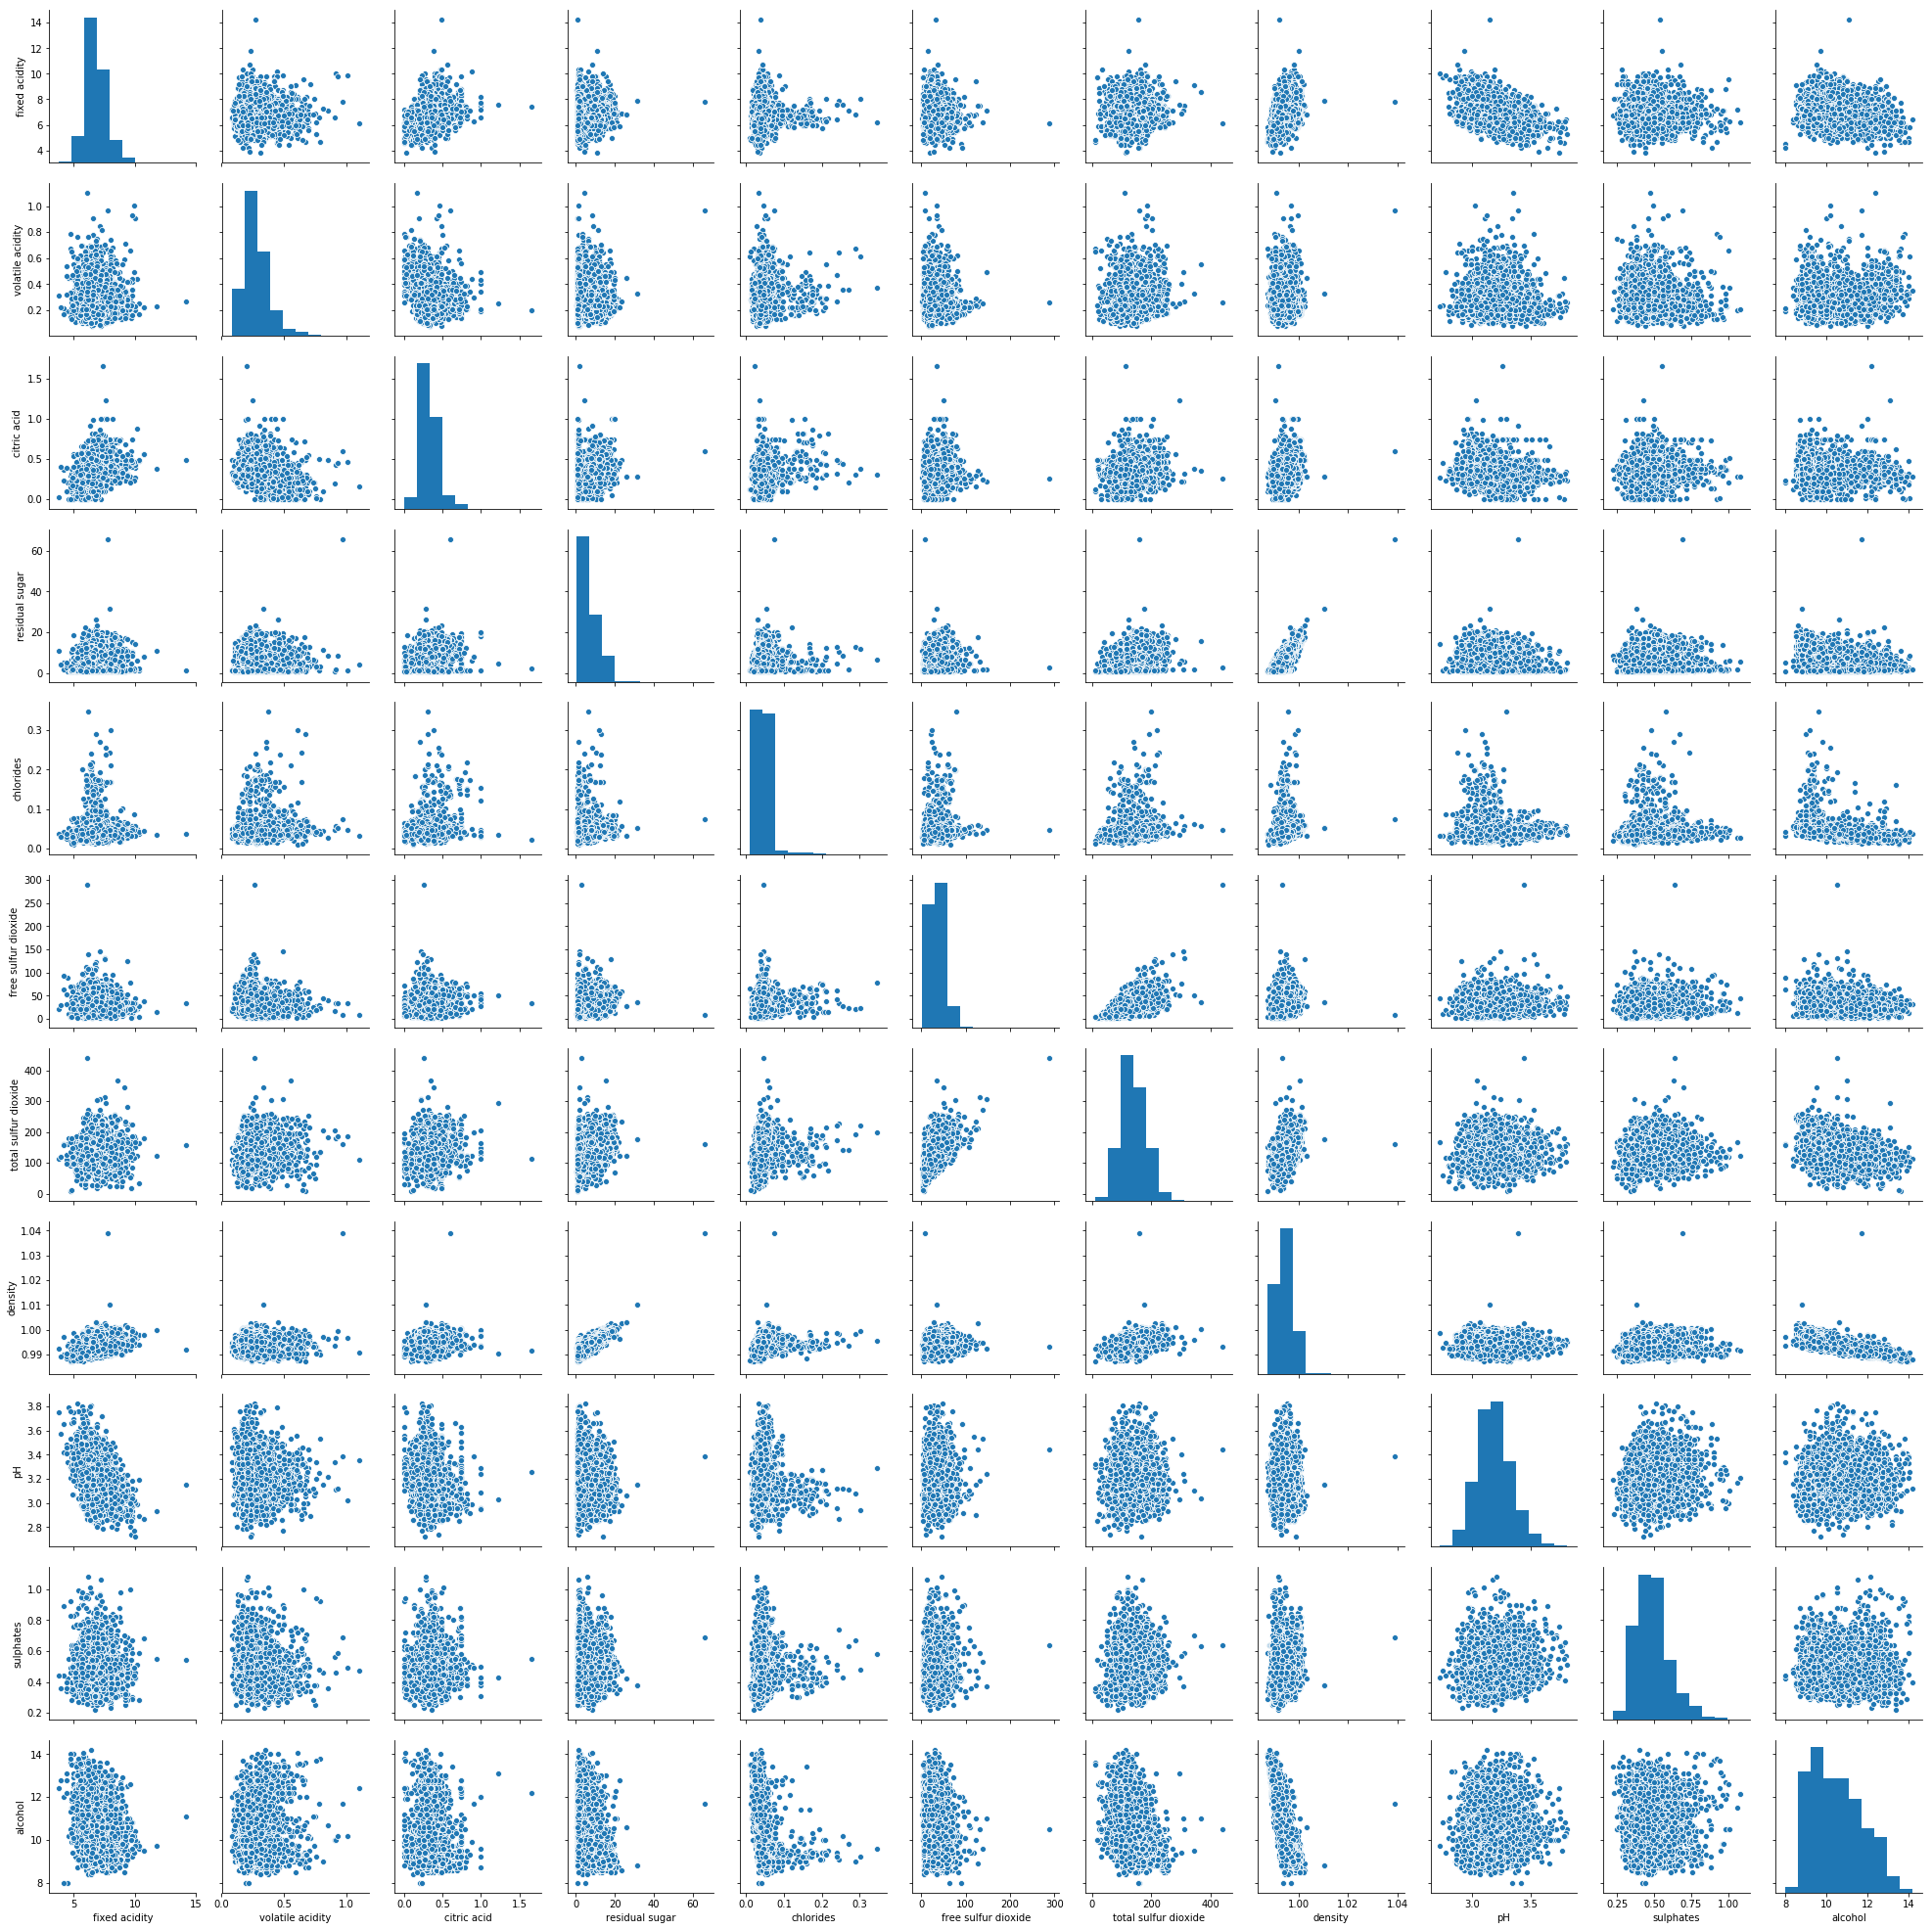

In [211]:
pairplot_x=x[x.columns[np.r_[0:11]]]
sns.pairplot(data=pairplot_x)